# Training an MNIST Classification Model

In this short notebook, we'll train a logistic regression model for classifying handwritten digits, with the aim of incorporating this model into a webapp.

For a more thorough discussion training and assessing the model, please consult [these lecture notes](https://nbviewer.org/github/PhilChodrow/PIC16A/blob/master/content/ML/digits.ipynb) or [this video](https://youtu.be/H6YG4HMAZPU) from PIC16A. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

First we'll acquire the data and take a look: 

In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Here's an individual digit. Note that we need to reshape the data into a square shape to plot it. 

[Text(0.5, 1.0, 'True digit: 1')]

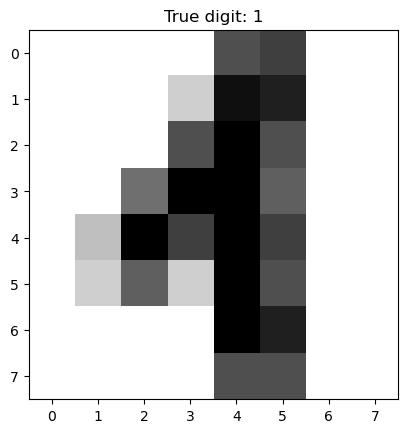

In [3]:
fig, ax = plt.subplots(1)
i = 200

ax.imshow(digits['data'][i].reshape(8, 8), cmap = plt.cm.binary)
ax.set(title = "True digit: " + str(digits['target'][i]))

Now we'll split the data into training and test sets. 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

Next we'll create a logistic regression model and fit it to the training data. 

In [5]:
m = LogisticRegression(random_state = 0, solver = "liblinear")

In [6]:
m.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

How well does our model predict unseen images in the test set? 

In [7]:
m.score(X_test, y_test)

0.9533333333333334

## Pickling

Now for the key step for today: we are going to **pickle** the model so that we can use it elsewhere. You can think of pickling is just a funny word for *saving* the model. We pickle the model by caling `pickle.dump` with an open file connection. 

In [9]:
import pickle
filename = 'model.pkl'
pickle.dump(m, open(filename, 'wb'))

Once we've pickled the model, we can use it anywhere we want, by using `pickle.load()`. 

In [10]:
M = pickle.load(open(filename, 'rb'))

In [11]:
M.score(X_test, y_test)

0.9622222222222222

## Saving Example Digits

The code below saves a few example digits for us to play with in our webapp. 

In [14]:
for i in range(10):
    j = np.random.randint(0, digits["data"].shape[0])
    np.savetxt("sample-data/" + str(j) + ".txt", digits['data'][j].reshape(8, 8))